In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn import model_selection

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
import statsmodels.api as sm

In [7]:
import statsmodels.formula.api as smf

In [8]:
import warnings

In [9]:
import copy

In [10]:
warnings.filterwarnings('ignore')

In [11]:
#display setting
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [12]:
bank = pd.read_csv("D:\\Users\\zsy\\Desktop\\python PJ\\bank.csv")

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Descriptive statistics

In [14]:
bank.groupby('y').size()

y
no     4000
yes     521
dtype: int64

The distribution of y is imbanlanced

In [15]:
bank.groupby('job').size()

job
admin.           478
blue-collar      946
entrepreneur     168
housemaid        112
management       969
retired          230
self-employed    183
services         417
student           84
technician       768
unemployed       128
unknown           38
dtype: int64

In [16]:
bank.groupby('marital').size()

marital
divorced     528
married     2797
single      1196
dtype: int64

In [17]:
bank.groupby('education').size()

education
primary       678
secondary    2306
tertiary     1350
unknown       187
dtype: int64

In [18]:
bank.groupby('default').size()

default
no     4445
yes      76
dtype: int64

In [19]:
bank.groupby('contact').size()

contact
cellular     2896
telephone     301
unknown      1324
dtype: int64

In [20]:
bank.groupby('poutcome').size()

poutcome
failure     490
other       197
success     129
unknown    3705
dtype: int64

In [21]:
#月份数据转为定性变量
bank.groupby('month').size()

month
apr     293
aug     633
dec      20
feb     222
jan     148
jul     706
jun     531
mar      49
may    1398
nov     389
oct      80
sep      52
dtype: int64

In [22]:
bank['month'][bank['month']=='apr']=4
bank['month'][bank['month']=='aug']=8
bank['month'][bank['month']=='dec']=12
bank['month'][bank['month']=='feb']=2
bank['month'][bank['month']=='jan']=1
bank['month'][bank['month']=='jul']=7
bank['month'][bank['month']=='jun']=6
bank['month'][bank['month']=='mar']=3
bank['month'][bank['month']=='may']=5
bank['month'][bank['month']=='nov']=11
bank['month'][bank['month']=='oct']=10
bank['month'][bank['month']=='sep']=9
bank['month'] = bank['month'].apply(lambda x:int(x))

#### bench mark

In [255]:
train, test = model_selection.train_test_split(bank,train_size=0.8,random_state = 2020)

In [257]:
train.groupby('y').size()

y
no     3194
yes     422
dtype: int64

In [258]:
benchmark = []
for i in range(len(test)):
    benchmark.append('no')

In [262]:
(benchmark == test['y']).mean()

0.8906077348066298

#### logistic without categorical variables

In [102]:
bank_con1 = bank[['age','balance','day','month','duration','campaign','pdays','previous','y']]

In [120]:
bank_con1_train, bank_con1_test = model_selection.train_test_split(bank_con1,train_size=0.8,random_state = 2020)

In [104]:
glm_con1_fit = smf.glm("y~age+balance+day+month+duration+campaign+pdays+previous",data = bank_con1_train,family=sm.families.Binomial()).fit()

In [105]:
print(glm_con1_fit.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['y[no]', 'y[yes]']   No. Observations:                 3616
Model:                             GLM   Df Residuals:                     3607
Model Family:                 Binomial   Df Model:                            8
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -1055.4
Date:                 Sun, 18 Oct 2020   Deviance:                       2110.7
Time:                         11:52:17   Pearson chi2:                 5.25e+03
No. Iterations:                      6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2763      0.305     14.02

In [106]:
glm_prob = glm_con1_fit.predict(bank_con1_test)
glm_prob[:10]

501     0.935037
4156    0.934205
3578    0.913581
1795    0.985978
1180    0.930094
3405    0.941117
1852    0.949043
3346    0.888736
3282    0.948481
313     0.837104
dtype: float64

In [107]:
import numpy as np 
glm_pred = np.repeat('yes', len(glm_prob))
glm_pred[glm_prob > 0.5] = 'no'
y_true = bank_con1_test["y"].values

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, glm_pred,labels=['yes','no'])

array([[ 17,  82],
       [ 12, 794]], dtype=int64)

In [42]:
tn, fp, fn, tp = confusion_matrix(y_true, glm_pred,labels=['yes','no']).ravel()

In [43]:
(tn, fp, fn, tp)

(17, 82, 12, 794)

In [30]:
(glm_pred == y_true).mean()

0.8961325966850828

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_true,glm_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94       806
         yes       0.59      0.17      0.27        99

    accuracy                           0.90       905
   macro avg       0.75      0.58      0.60       905
weighted avg       0.87      0.90      0.87       905



In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [122]:
import copy
y = copy.deepcopy(bank_con1_test["y"]).values
y[y=='yes'] = 0
y[y=='no'] = 1

In [111]:
y=np.array(y)
score = np.array(glm_prob.values)

In [112]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

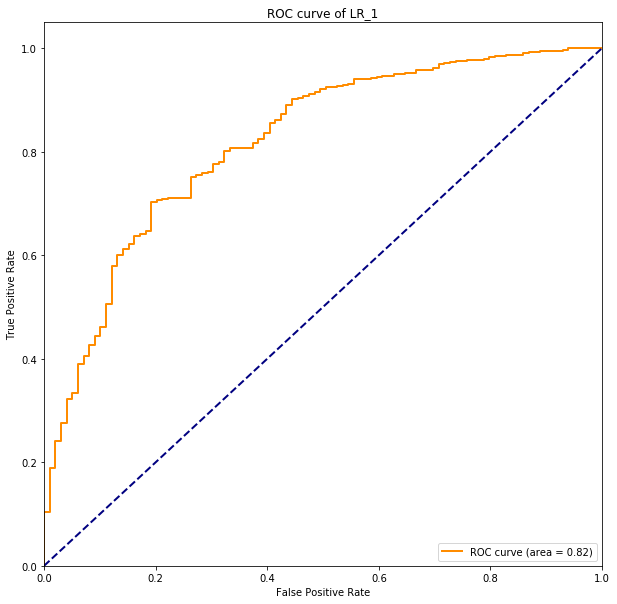

In [113]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

##### delete insignificant variables

In [114]:
glm_con2_fit = smf.glm("y~age+duration+campaign+pdays+previous",data = bank_con1_train,family=sm.families.Binomial()).fit()

In [88]:
print(glm_con2_fit.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['y[no]', 'y[yes]']   No. Observations:                 3616
Model:                             GLM   Df Residuals:                     3610
Model Family:                 Binomial   Df Model:                            5
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -1057.7
Date:                 Sun, 18 Oct 2020   Deviance:                       2115.3
Time:                         11:48:14   Pearson chi2:                 5.64e+03
No. Iterations:                      6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0172      0.248     16.16

In [115]:
glm_prob = glm_con2_fit.predict(bank_con1_test)
glm_prob[:10]

501     0.934140
4156    0.934410
3578    0.907020
1795    0.986174
1180    0.923826
3405    0.936887
1852    0.945137
3346    0.901886
3282    0.949104
313     0.842063
dtype: float64

In [123]:
import numpy as np 
glm_pred = np.repeat('yes', len(glm_prob))
glm_pred[glm_prob > 0.5] = 'no'
y_true = bank_con1_test["y"].values

In [124]:
y_true

array(['no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', '

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, glm_pred,labels=['yes','no'])

array([[ 19,  80],
       [ 12, 794]], dtype=int64)

In [126]:
tn, fp, fn, tp = confusion_matrix(y_true, glm_pred,labels=['yes','no']).ravel()

In [127]:
(tn, fp, fn, tp)

(19, 80, 12, 794)

In [128]:
(glm_pred == y_true).mean()

0.8983425414364641

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_true,glm_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95       806
         yes       0.61      0.19      0.29        99

    accuracy                           0.90       905
   macro avg       0.76      0.59      0.62       905
weighted avg       0.88      0.90      0.87       905



In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [131]:
y_true = bank_con1_test["y"].values
y_true[y_true=='yes'] = 0
y_true[y_true=='no'] = 1

In [132]:
y=np.array(y_true)
score = np.array(glm_prob.values)

In [133]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

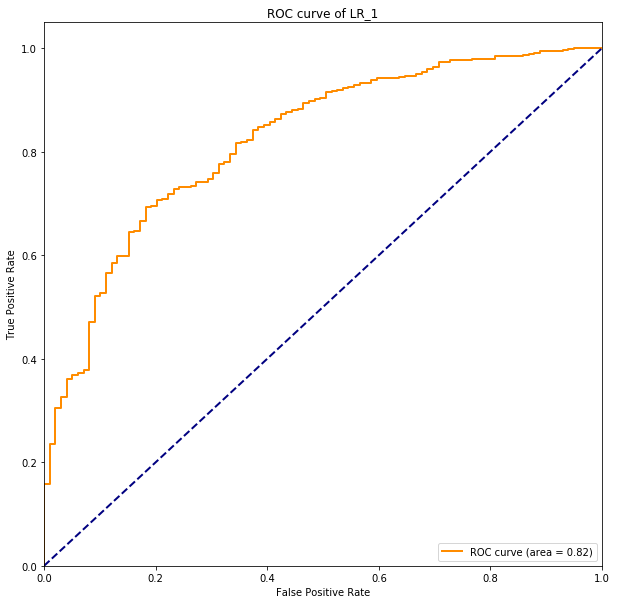

In [134]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

#### categorical

In [135]:
bank_cat = copy.deepcopy(bank)

In [136]:
bank_cat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


binary(yes:0 ; no:1): default ; housing ; loan ; y
catogorical : job(12) ; marital(3) ; education(4) ; contact(3) ; poutcome(4) 

In [137]:
bank_cat['default'] = np.where(bank_cat['default'] == 'no' , 1, 0)
bank_cat['housing'] = np.where(bank_cat['housing'] == 'no' , 1, 0)
bank_cat['loan'] = np.where(bank_cat['loan'] == 'no' , 1, 0)

#### convert categorical variables into integer

job

In [138]:
caluse = copy.deepcopy(bank)
caluse = pd.get_dummies(caluse, columns=['y'])

In [139]:
caluse.groupby('job').size()

job
admin.           478
blue-collar      946
entrepreneur     168
housemaid        112
management       969
retired          230
self-employed    183
services         417
student           84
technician       768
unemployed       128
unknown           38
dtype: int64

In [140]:
job = {}

In [141]:
job['admin.'] = sum(caluse[caluse['job']=='admin.']['y_no'])/sum(caluse[caluse['job']=='admin.']['y_yes'])
job['blue-collar'] = sum(caluse[caluse['job']=='blue-collar']['y_no'])/sum(caluse[caluse['job']=='blue-collar']['y_yes'])
job['entrepreneur'] = sum(caluse[caluse['job']=='entrepreneur']['y_no'])/sum(caluse[caluse['job']=='entrepreneur']['y_yes'])
job['housemaid'] = sum(caluse[caluse['job']=='housemaid']['y_no'])/sum(caluse[caluse['job']=='housemaid']['y_yes'])
job['management'] = sum(caluse[caluse['job']=='management']['y_no'])/sum(caluse[caluse['job']=='management']['y_yes'])
job['retired'] = sum(caluse[caluse['job']=='retired']['y_no'])/sum(caluse[caluse['job']=='retired']['y_yes'])
job['self-employed'] = sum(caluse[caluse['job']=='self-employed']['y_no'])/sum(caluse[caluse['job']=='self-employed']['y_yes'])
job['services'] = sum(caluse[caluse['job']=='services']['y_no'])/sum(caluse[caluse['job']=='services']['y_yes'])
job['student'] = sum(caluse[caluse['job']=='student']['y_no'])/sum(caluse[caluse['job']=='student']['y_yes'])
job['technician'] = sum(caluse[caluse['job']=='technician']['y_no'])/sum(caluse[caluse['job']=='technician']['y_yes'])
job['unemployed'] = sum(caluse[caluse['job']=='unemployed']['y_no'])/sum(caluse[caluse['job']=='unemployed']['y_yes'])
job['unknown'] = sum(caluse[caluse['job']=='unknown']['y_no'])/sum(caluse[caluse['job']=='unknown']['y_yes'])


In [142]:
job

{'admin.': 7.241379310344827,
 'blue-collar': 12.710144927536232,
 'entrepreneur': 10.2,
 'housemaid': 7.0,
 'management': 6.396946564885496,
 'retired': 3.259259259259259,
 'self-employed': 8.15,
 'services': 9.973684210526315,
 'student': 3.4210526315789473,
 'technician': 8.25301204819277,
 'unemployed': 8.846153846153847,
 'unknown': 4.428571428571429}

In [143]:
bank_cat['job'][bank_cat['job']=='admin.']=7.241379310344827
bank_cat['job'][bank['job']=='blue-collar']=12.710144927536232
bank_cat['job'][bank['job']=='entrepreneur']=10.2
bank_cat['job'][bank['job']=='housemaid']=7.0
bank_cat['job'][bank['job']=='management']=6.396946564885496
bank_cat['job'][bank['job']=='retired']=3.25925925925925
bank_cat['job'][bank['job']=='self-employed']=8.15
bank_cat['job'][bank['job']=='services']=9.973684210526315
bank_cat['job'][bank['job']=='student']=3.421
bank_cat['job'][bank['job']=='technician']=8.25
bank_cat['job'][bank['job']=='unemployed']=8.846
bank_cat['job'][bank['job']=='unknown']=4.428571428571429

In [144]:
bank_cat['job'] = bank_cat['job'].apply(float)

#job
job_order = list(bank_cat.groupby('job').size().sort_values().index)
bank_cat['job'] = bank_cat['job'].astype("category",  order=True,  category=job_order).cat.codes

marital

In [145]:
caluse.groupby('marital').size()

marital
divorced     528
married     2797
single      1196
dtype: int64

In [146]:
marital = {}
marital['divorced'] = sum(caluse[caluse['marital']=='divorced']['y_no'])/sum(caluse[caluse['marital']=='divorced']['y_yes'])
marital['married'] = sum(caluse[caluse['marital']=='married']['y_no'])/sum(caluse[caluse['marital']=='married']['y_yes'])
marital['single'] = sum(caluse[caluse['marital']=='single']['y_no'])/sum(caluse[caluse['marital']=='single']['y_yes'])

In [147]:
marital

{'divorced': 5.857142857142857,
 'married': 9.097472924187725,
 'single': 6.161676646706587}

In [148]:
bank_cat['marital'][bank_cat['marital']=='divorced'] = 5.857142857142857
bank_cat['marital'][bank_cat['marital']=='married'] = 9.097472924187725
bank_cat['marital'][bank_cat['marital']=='single'] = 6.161676646706587                    

In [149]:
bank_cat['marital'] = bank_cat['marital'].apply(float)

#marital
marital_order = list(bank_cat.groupby('marital').size().sort_values().index)
bank_cat['marital']= bank['marital'].astype("category",order = True , category = marital_order).cat.codes

education

In [150]:
caluse.groupby('education').size()

education
primary       678
secondary    2306
tertiary     1350
unknown       187
dtype: int64

In [151]:
education = {}
education['primary']  =  sum(caluse[caluse['education']=='primary']['y_no'])/sum(caluse[caluse['education']=='primary']['y_yes'])
education['secondary']  =  sum(caluse[caluse['education']=='secondary']['y_no'])/sum(caluse[caluse['education']=='secondary']['y_yes'])
education['tertiary']  =  sum(caluse[caluse['education']=='tertiary']['y_no'])/sum(caluse[caluse['education']=='tertiary']['y_yes'])
education['unknown']  =  sum(caluse[caluse['education']=='unknown']['y_no'])/sum(caluse[caluse['education']=='unknown']['y_yes'])


In [152]:
education

{'primary': 9.59375,
 'secondary': 8.412244897959184,
 'tertiary': 5.994818652849741,
 'unknown': 8.842105263157896}

In [153]:
bank_cat['education'][bank_cat['education']=='primary'] = 9.59375
bank_cat['education'][bank_cat['education']=='secondary']=8.412244897959184
bank_cat['education'][bank_cat['education']=='tertiary']=5.994818652849741
bank_cat['education'][bank_cat['education']=='unknown']=8.842105263157896
                      

In [154]:
bank_cat['education'] = bank_cat['education'].apply(float)

#education
education_order = list(bank_cat.groupby('education').size().sort_values().index)
bank_cat['education'] = ban_cat['education'].astype("category",order = True, category = education_order).cat.codes

contact

In [155]:
caluse.groupby('contact').size()

contact
cellular     2896
telephone     301
unknown      1324
dtype: int64

In [156]:
contact = {}
contact['cellular']  =  sum(caluse[caluse['contact']=='cellular']['y_no'])/sum(caluse[caluse['contact']=='cellular']['y_yes'])
contact['telephone']  =  sum(caluse[caluse['contact']=='telephone']['y_no'])/sum(caluse[caluse['contact']=='telephone']['y_yes'])
contact['unknown']  =  sum(caluse[caluse['contact']=='unknown']['y_no'])/sum(caluse[caluse['contact']=='unknown']['y_yes'])
contact

{'cellular': 5.961538461538462,
 'telephone': 5.840909090909091,
 'unknown': 20.704918032786885}

In [157]:
bank_cat['contact'][bank_cat['contact']=='cellular'] =5.961538461538462
bank_cat['contact'][bank_cat['contact']=='telephone']=5.84090909090909
bank_cat['contact'][bank_cat['contact']=='unknown']=20.704918032786885

In [158]:
bank_cat['contact'] = bank_cat['contact'].apply(float)

#contact
contact_order = list(bank_cat.groupby('contact').size().sort_values().index)
bank_cat['contact'] = bank_cat['contact'].astype("category",order = True, category = contact_order).cat.codes

poutcome

In [159]:
caluse.groupby('poutcome').size()

poutcome
failure     490
other       197
success     129
unknown    3705
dtype: int64

In [160]:
poutcome = {}
poutcome['failure']  =  sum(caluse[caluse['poutcome']=='failure']['y_no'])/sum(caluse[caluse['poutcome']=='failure']['y_yes'])
poutcome['other']  =  sum(caluse[caluse['poutcome']=='other']['y_no'])/sum(caluse[caluse['poutcome']=='other']['y_yes'])
poutcome['success']  =  sum(caluse[caluse['poutcome']=='success']['y_no'])/sum(caluse[caluse['poutcome']=='success']['y_yes'])
poutcome['unknown']  =  sum(caluse[caluse['poutcome']=='unknown']['y_no'])/sum(caluse[caluse['poutcome']=='unknown']['y_yes'])
poutcome

{'failure': 6.777777777777778,
 'other': 4.184210526315789,
 'success': 0.5542168674698795,
 'unknown': 9.99406528189911}

In [161]:
bank_cat['poutcome'][bank_cat['poutcome']=='failure'] =6.777777777777778
bank_cat['poutcome'][bank_cat['poutcome']=='other']=4.184210526315789
bank_cat['poutcome'][bank_cat['poutcome']=='success']= 0.5542168674698795
bank_cat['poutcome'][bank_cat['poutcome']== 'unknown']=9.99406528189911

In [162]:
bank_cat['poutcome'] = bank_cat['poutcome'].apply(float)

#poutcome
poutcome_order = list(bank_cat.groupby("poutcome").size().sort_values().index)
bank_cat['poutcome'] = bank_cat['poutcome'].astype('category',order = True , category = poutcome_order).cat.codes

In [163]:
bank_cat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.846000,9.097473,9.593750,1,1787,1,1,5.961538,19,10,79,1,-1,0,9.994065,no
1,33,9.973684,9.097473,8.412245,1,4789,0,0,5.961538,11,5,220,1,339,4,6.777778,no
2,35,6.396947,6.161677,5.994819,1,1350,0,1,5.961538,16,4,185,1,330,1,6.777778,no
3,30,6.396947,9.097473,5.994819,1,1476,0,0,20.704918,3,6,199,4,-1,0,9.994065,no
4,59,12.710145,9.097473,8.412245,1,0,0,1,20.704918,5,5,226,1,-1,0,9.994065,no


In [164]:
#split into train and test set
bank_cat_train,bank_cat_test = model_selection.train_test_split(bank_cat,train_size=0.8,random_state = 2020)

In [165]:
glm_cat_fit = smf.glm("y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome",data=bank_cat_train,family = sm.families.Binomial()).fit()

In [166]:
print(glm_cat_fit.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['y[no]', 'y[yes]']   No. Observations:                 3616
Model:                             GLM   Df Residuals:                     3599
Model Family:                 Binomial   Df Model:                           16
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -933.99
Date:                 Sun, 18 Oct 2020   Deviance:                       1868.0
Time:                         15:12:16   Pearson chi2:                 9.30e+03
No. Iterations:                      7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0386      0.794     -2.56

In [167]:
glm_prob = glm_cat_fit.predict(bank_cat_test)
glm_prob[:10]

501     0.970819
4156    0.896639
3578    0.977730
1795    0.990503
1180    0.912551
3405    0.984340
1852    0.987475
3346    0.932899
3282    0.961415
313     0.863266
dtype: float64

In [168]:
glm_pred = np.repeat('yes', len(glm_prob))
glm_pred[glm_prob > 0.5] = 'no'
y_true = bank_cat_test["y"].values

In [169]:
confusion_matrix(y_true, glm_pred).T

array([[790,  71],
       [ 16,  28]], dtype=int64)

In [170]:
(glm_pred == y_true).mean()

0.9038674033149171

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_true,glm_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       806
         yes       0.64      0.28      0.39        99

    accuracy                           0.90       905
   macro avg       0.78      0.63      0.67       905
weighted avg       0.89      0.90      0.89       905



In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [173]:
y_true = bank_cat_test["y"].values
y_true[y_true=='yes'] = 0
y_true[y_true=='no'] = 1

In [174]:
y=np.array(y_true)
score = np.array(glm_prob.values)

In [175]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

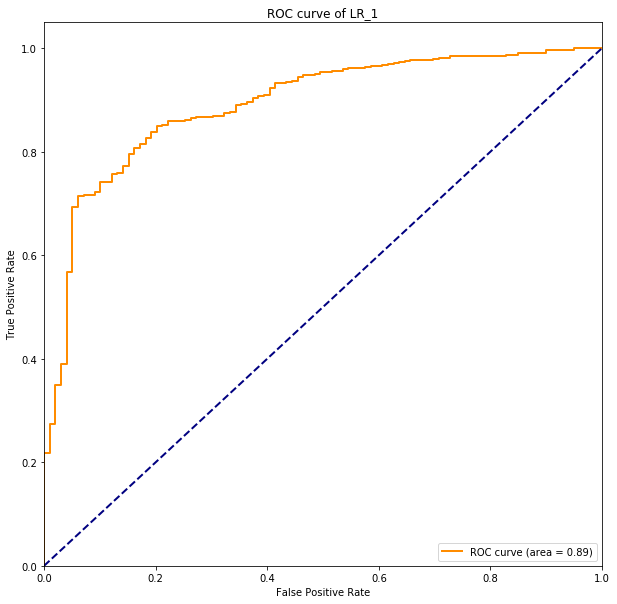

In [176]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

#### target encoder

In [179]:
import category_encoders as ce

In [177]:
bank_tar = copy.deepcopy(bank)

In [178]:
bank_tar.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


In [180]:
tar = ['job','marital','education','default','housing','loan','contact','poutcome']

In [186]:
bank_tar['y_f']=bank_tar['y']
bank_tar['y_f'][bank_tar['y']=='no'] = 1
bank_tar['y_f'][bank_tar['y']=='yes'] = 0

In [189]:
bank_tar['y_f'] = bank_tar['y_f'].apply(lambda x :int(x))

In [190]:
encoder_1 = ce.TargetEncoder(cols=tar).fit(bank_tar,bank_tar['y_f'])
bank_tar = encoder_1.transform(bank_tar)

In [191]:
bank_tar.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_f
0,30,0.898438,0.900965,0.905605,0.884814,1787,0.846585,0.875196,0.856354,19,10,79,1,-1,0,0.909042,no,1
1,33,0.908873,0.900965,0.893755,0.884814,4789,0.914029,0.937771,0.856354,11,5,220,1,339,4,0.871429,no,1
2,35,0.864809,0.860368,0.857037,0.884814,1350,0.914029,0.875196,0.856354,16,4,185,1,330,1,0.871429,no,1
3,30,0.864809,0.900965,0.857037,0.884814,1476,0.914029,0.937771,0.953927,3,6,199,4,-1,0,0.909042,no,1
4,59,0.927061,0.900965,0.893755,0.884814,0,0.914029,0.875196,0.953927,5,5,226,1,-1,0,0.909042,no,1


In [192]:
del bank_tar['y_f']

In [193]:
#split into train and  test set
bank_tar_train,bank_tar_test = model_selection.train_test_split(bank_tar,train_size=0.8,random_state=2020)

In [195]:
bank_tar_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [196]:
glm_tar_fit = smf.glm('y~age+balance+day+month+duration+campaign+pdays+previous+default+housing+loan+job+marital+education+contact+poutcome',data= bank_tar_train,family = sm.families.Binomial()).fit()

In [197]:
print(glm_tar_fit.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['y[no]', 'y[yes]']   No. Observations:                 3616
Model:                             GLM   Df Residuals:                     3599
Model Family:                 Binomial   Df Model:                           16
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -930.58
Date:                 Sun, 18 Oct 2020   Deviance:                       1861.2
Time:                         15:26:11   Pearson chi2:                 8.40e+03
No. Iterations:                      7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -214.9910    119.002     -1.80

In [198]:
glm_prob = glm_tar_fit.predict(bank_tar_test)
glm_prob[:10]

501     0.972594
4156    0.893862
3578    0.980164
1795    0.991468
1180    0.908719
3405    0.986341
1852    0.988979
3346    0.955376
3282    0.963340
313     0.860005
dtype: float64

In [199]:
glm_pred = np.repeat('yes', len(glm_prob))
glm_pred[glm_prob > 0.5] = 'no'
y_true = bank_tar_test["y"].values

In [200]:
confusion_matrix(y_true, glm_pred).T

array([[794,  66],
       [ 12,  33]], dtype=int64)

In [201]:
(glm_pred == y_true).mean()

0.9138121546961326

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_true,glm_pred))

              precision    recall  f1-score   support

          no       0.92      0.99      0.95       806
         yes       0.73      0.33      0.46        99

    accuracy                           0.91       905
   macro avg       0.83      0.66      0.71       905
weighted avg       0.90      0.91      0.90       905



In [203]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [205]:
y_true = bank_tar_test["y"].values
y_true[y_true=='yes'] = 0
y_true[y_true=='no'] = 1

In [206]:
y=np.array(y_true)
score = np.array(glm_prob.values)

In [207]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

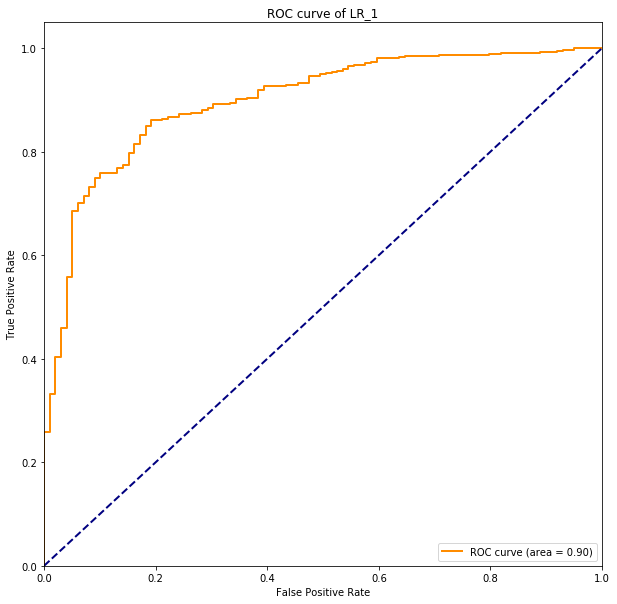

In [208]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

#### get dummies

In [209]:
bank_bin = copy.deepcopy(bank)

binary: default ; housing ; loan ; y
catogorical : job(12) ; marital(3) ; education(4) ; contact(3) ; poutcome(4) 

In [210]:
category = ['default','housing','loan','job','marital','education','contact','poutcome']

In [211]:
bank_bin = pd.get_dummies(bank_bin, columns=category)

In [234]:
bank_bin['job_admin'] = bank_bin['job_admin.'].rename(columns={'job_admin'},inplace = True)

In [235]:
bank_bin['job_self'] = bank_bin['job_self-employed'].rename(columns={'job_self'},inplace = True)

In [237]:
bank_bin['job_blue'] = bank_bin['job_blue-collar'].rename(columns={'job_blue'},inplace = True)

In [236]:
bank_bin.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin,job_self
0,30,1787,19,10,79,1,-1,0,no,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,33,4789,11,5,220,1,339,4,no,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,35,1350,16,4,185,1,330,1,no,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,30,1476,3,6,199,4,-1,0,no,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,59,0,5,5,226,1,-1,0,no,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [227]:
bank_bin.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,10,79,1,-1,0,no,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
1,33,4789,11,5,220,1,339,4,no,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,35,1350,16,4,185,1,330,1,no,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
3,30,1476,3,6,199,4,-1,0,no,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,59,0,5,5,226,1,-1,0,no,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


In [238]:
#split into train and  test set
bank_bin_train,bank_bin_test = model_selection.train_test_split(bank_bin,train_size=0.8,random_state=2020)

In [239]:
glm_bin_fit = smf.glm('y~age+balance+day+month+duration+campaign+pdays+previous+default_no+default_yes+housing_no+housing_yes+loan_no+loan_yes+job_admin +job_blue+job_entrepreneur+job_housemaid+job_management+job_retired+job_self+job_services+job_student+job_technician+job_unemployed+job_unknown+marital_divorced+marital_married+marital_single+education_primary+education_secondary+education_tertiary+education_unknown+contact_cellular+contact_telephone+contact_unknown+poutcome_failure+poutcome_other+poutcome_success+poutcome_unknown',data= bank_bin_train,family = sm.families.Binomial()).fit()

In [240]:
print(glm_bin_fit.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['y[no]', 'y[yes]']   No. Observations:                 3616
Model:                             GLM   Df Residuals:                     3583
Model Family:                 Binomial   Df Model:                           32
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -926.67
Date:                 Sun, 18 Oct 2020   Deviance:                       1853.3
Time:                         15:38:38   Pearson chi2:                 6.20e+03
No. Iterations:                      7                                         
Covariance Type:             nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

In [241]:
glm_prob = glm_bin_fit.predict(bank_bin_test)
glm_prob[:10]

501     0.966481
4156    0.920503
3578    0.980765
1795    0.989228
1180    0.901284
3405    0.982409
1852    0.989273
3346    0.939444
3282    0.952686
313     0.866459
dtype: float64

In [242]:
glm_pred = np.repeat('yes', len(glm_prob))
glm_pred[glm_prob > 0.5] = 'no'
y_true = bank_bin_test["y"].values

In [252]:
glm_prob

501     0.966481
4156    0.920503
3578    0.980765
1795    0.989228
1180    0.901284
3405    0.982409
1852    0.989273
3346    0.939444
3282    0.952686
313     0.866459
3709    0.942446
830     0.916851
1037    0.972891
250     0.943242
3312    0.804610
2133    0.928654
3276    0.973569
3034    0.986062
3948    0.909528
3099    0.952151
3336    0.991300
3591    0.977784
1456    0.991701
1677    0.938169
3011    0.924487
3950    0.987181
4461    0.960336
2001    0.998217
1240    0.963659
4502    0.984824
4020    0.867764
2318    0.873550
3461    0.936361
2134    0.962054
4171    0.772042
1526    0.863953
731     0.982570
264     0.640956
3140    0.976036
1657    0.964420
3362    0.773639
238     0.985707
2687    0.958146
3537    0.958321
3550    0.987656
1490    0.931646
1522    0.989382
36      0.859330
714     0.899908
4097    0.976563
2487    0.688762
2905    0.937732
2557    0.962469
438     0.973740
1713    0.974165
981     0.978392
850     0.786768
305     0.910240
3843    0.2349

In [244]:
confusion_matrix(y_true, glm_pred)

array([[792,  14],
       [ 66,  33]], dtype=int64)

In [245]:
(glm_pred == y_true).mean()

0.9116022099447514

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_true,glm_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       806
         yes       0.70      0.33      0.45        99

    accuracy                           0.91       905
   macro avg       0.81      0.66      0.70       905
weighted avg       0.90      0.91      0.90       905



In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [248]:
y_true = bank_bin_test["y"].values
y_true[y_true=='yes'] = 0
y_true[y_true=='no'] = 1

In [249]:
y=np.array(y_true)
score = np.array(glm_prob.values)

In [250]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

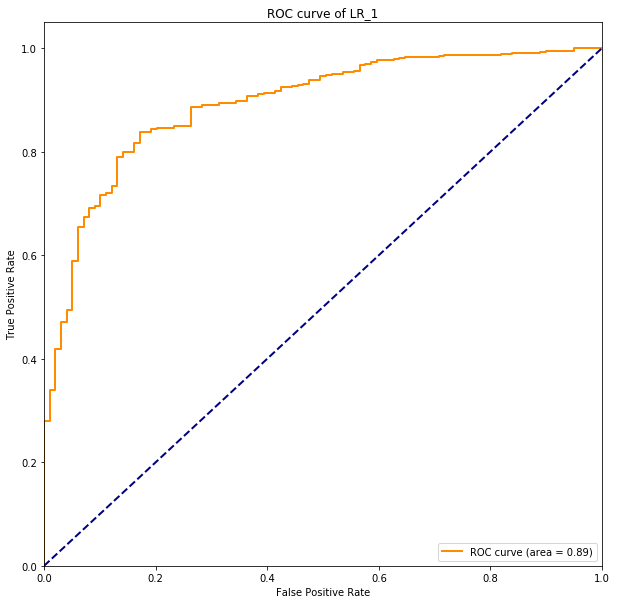

In [251]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()